Phương pháp k-means tập trung quy hoạch các điểm dữ liệu thành k nhóm sao cho các điểm dữ liệu trong từng nhóm này có khoảng cách so với điểm trung tâm là nhỏ nhất. Để minh họa phương pháp k means, ta sẽ tạo các điểm ngẫu nhiên như bài trước (hierarchical clustering). Sau đó, ta sẽ lần lượt tiến hành từng bước trong phương pháp này.
<blockquote> 
<p class="p1"><strong>Strengths:</strong> nhanh, dễ cài đặt, flexible nếu bạn pre-process data kĩ để giữ lại các feature hữu ích cho quá trình clustering.</p>
<p class="p1"><strong>Weaknesses:</strong> phải xác định được số lượng clusters, điều này khó thực hiện. Thêm vào đó, nếu các cluster không ở dạng hình cầu thì k-means sẽ cluster rất tệ.</p>
</blockquote>

In [1]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)

In [2]:
set.seed(1234);
x <- rnorm(12,mean=rep(1:3,each=4),sd=0.2)
y <- rnorm(12,mean=rep(c(1,2,1),each=4),sd=0.2)
dataFrame <- data.frame(x=x,y=y)

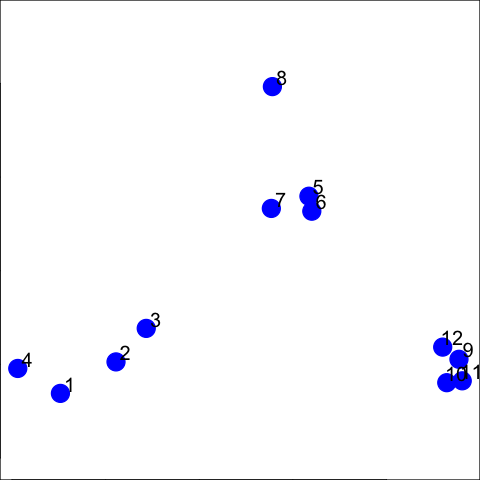

In [3]:
par(mar=c(0,0,0,0))
plot(x,y,col="blue",pch=19,cex=2,asp=1)
text(x+0.05,y+0.05,labels=as.character(1:12))

Tọa độ các điểm trung tâm gồm (1,2), (1.8,1) và (2.5,1.5). Ta sẽ chấm điểm các giá trị trung tâm này lên biểu đồ với hàm points() trong R.


In [4]:
cx <- c(1,1.8,2.5)
cy <- c(2,1,1.5)
cmat <- matrix(c(cx,cy),nrow=2,byrow=TRUE) 
cmat

1,1.8,2.5
2,1.0,1.5


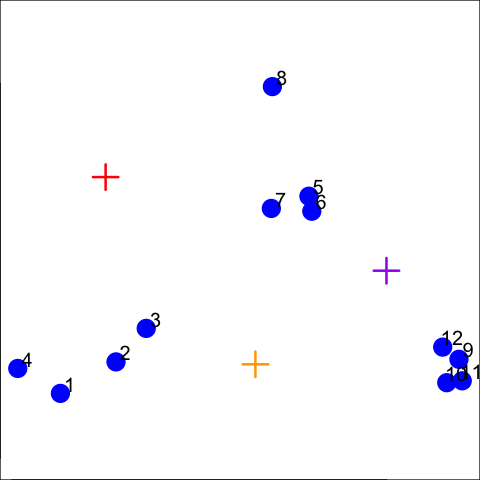

In [5]:
par(mar=c(0,0,0,0))
plot(x,y,col="blue",pch=19,cex=2,asp=1)
text(x+0.05,y+0.05,labels=as.character(1:12))
points(cx,cy,col=c("red","orange","purple"),pch=3,cex=2,lwd=2)

Ta thấy giá trị trung tâm (1,2) có màu đỏ, (1.8,1) có màu cam, (2.5,1.5) có màu tía. Tiếp theo, ta sẽ tính khoảng cách giữa các điểm dữ liệu so với các giá trị trung tâm. Ta có 12 điểm dữ liệu và 3 giá trị trung tâm. Do đó, tổng khoảng cách cần phải tính là 3 x 12 = 36. Ta sử dụng hàm mdist để tính các khoảng cách này.


In [6]:
mdist <- function(x,y,cx,cy){
  distTmp <- matrix(NA,nrow=3,ncol=12)
  distTmp[1,] <- (x-cx[1])^2 + (y-cy[1])^2
  distTmp[2,] <- (x-cx[2])^2 + (y-cy[2])^2
  distTmp[3,] <- (x-cx[3])^2 + (y-cy[3])^2
  return(distTmp)
}    

In [7]:
# tính khoảng cách các điểm dữ liệu so với giá trị trung tâm
distTmp <- mdist(x,y,cx,cy)
distTmp

1.392885,0.9774614,0.7000680,1.264693,1.1894610,1.2458771,0.8113513,1.026750,4.5082665,4.5255617,4.8113368,4.0657750
1.108644,0.5544675,0.3768445,1.611202,0.8877373,0.7594611,0.7003994,2.208006,1.1825265,1.0540994,1.2278193,1.0090944
3.461873,2.3238956,1.7413021,4.150054,0.3297843,0.2600045,0.4887610,1.337896,0.3737554,0.4614472,0.5095428,0.2567247


Tiếp theo, ta sẽ gom nhóm các điểm dữ liệu vào các nhóm tương ứng. Ta duyệt từng cột dữ liệu trong ma trận distTmp và gom điểm dữ liệu này vào nhóm có khoảng cách gần nó nhất. Ví dụ như điểm dữ liệu nằm ở cột 6, giá trị khoảng cách nhỏ nhất là 0.2600045, nên ta sẽ gom điểm này vào nhóm 3. Ta sẽ sử dụng hàm which.min để hoàn thành tác vụ này.


In [8]:
cols1 <- c("red","orange","purple")
newClust <- apply(distTmp, 2, which.min)
newClust

[1] 2 2 2 1 3 3 3 1 3 3 3 3

Theo kết quả trên, rõ ràng điểm dữ liệu thứ 6 được gom vào nhóm 3. Ta thấy 3 điểm đầu tiên được gom vào nhóm 2 (giá trị trung tâm màu cam), và chỉ có 2 điểm (4 và 8) được gom vào nhóm 1 (giá trị trung tâm màu đỏ). Ta thử tô màu dữ liệu tương ứng với giá trị gom nhóm trên.


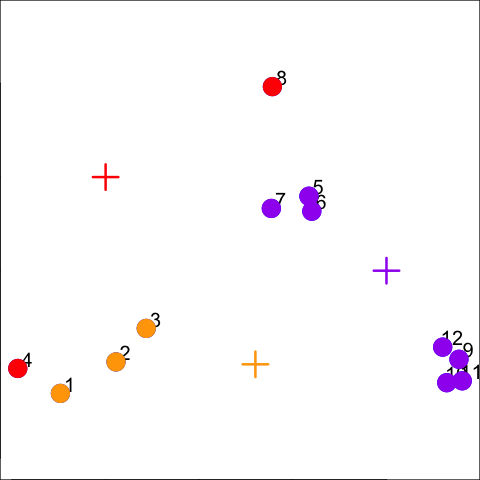

In [9]:
par(mar=c(0,0,0,0))
plot(x,y,col="blue",pch=19,cex=2,asp=1)
text(x+0.05,y+0.05,labels=as.character(1:12))
points(cx,cy,col=c("red","orange","purple"),pch=3,cex=2,lwd=2)
points(x,y,pch=19,cex=2,col=cols1[newClust])

Tiếp theo, ta cập nhật lại tọa độ các giá trị trung tâm dựa trên tọa độ trung bình của từng nhóm dữ liệu vừa được gom nhóm ở trên. Ta tiến hành tính giá trị trung bình cho tọa độ x và tọa độ y.


In [10]:
# giá trị trung bình theo tọa độ x
newCx <- tapply(x,newClust,mean)
print(newCx)

       1        2        3 
1.210767 1.010320 2.498011 


In [11]:
# giá trị trung bình theo tọa độ y
newCy <- tapply(y,newClust,mean)
print(newCy)

       1        2        3 
1.730555 1.016513 1.354373 


Bây giờ, ta có thể biểu diễn các giá trị trung tâm mới này lên biểu đồ.

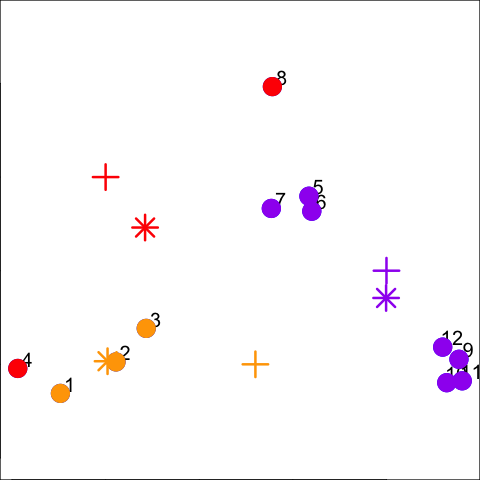

In [12]:
par(mar=c(0,0,0,0))
plot(x,y,col="blue",pch=19,cex=2,asp=1)
text(x+0.05,y+0.05,labels=as.character(1:12))
points(cx,cy,col=c("red","orange","purple"),pch=3,cex=2,lwd=2)
points(x,y,pch=19,cex=2,col=cols1[newClust])
points(newCx,newCy,col=cols1,pch=8,cex=2,lwd=2)

Ta có thể thấy các giá trị trung tâm tiến gần hơn đến nhóm của mình. Cứ như vậy, ta lại tính khoảng cách giữa các điểm dữ liệu so với các giá trị trung tâm vừa mới cập nhật bằng hàm mdist().

In [13]:
distTmp2 <- mdist(x,y,newCx,newCy)
distTmp2

0.98911875,0.539152725,0.2901879,1.0286979,0.7936966,0.8004956,0.4650664,1.028698,3.3053706,3.282778,3.5391512,2.9345445
0.09287262,0.002053041,0.0734304,0.2313694,1.9333732,1.8320407,1.4310971,2.926095,3.5224442,3.295301,3.5990955,3.2097944
3.28531180,2.197487387,1.6676725,4.0113796,0.4652075,0.3721778,0.6043861,1.643033,0.2586908,0.309730,0.3610747,0.1602755


In [14]:
# Tiếp theo, ta sẽ chọn ra khoảng cách nhỏ nhất để gom các điểm vào các nhóm tương ứng.
newClust2 <- apply(distTmp2,2,which.min)
newClust2

[1] 2 2 2 2 3 3 1 1 3 3 3 3

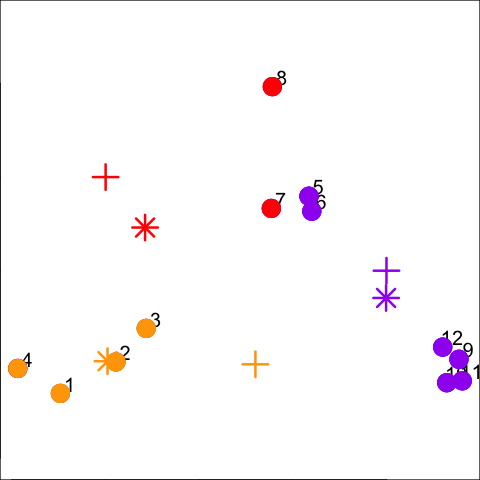

In [15]:
# Ta sẽ gán lại giá trị màu cho các điểm dữ liệu sau khi cập nhật lại nhóm mới.
par(mar=c(0,0,0,0))
plot(x,y,col="blue",pch=19,cex=2,asp=1)
text(x+0.05,y+0.05,labels=as.character(1:12))
points(cx,cy,col=c("red","orange","purple"),pch=3,cex=2,lwd=2)
points(x,y,pch=19,cex=2,col=cols1[newClust])
points(newCx,newCy,col=cols1,pch=8,cex=2,lwd=2)
points(x,y,pch=19,cex=2,col=cols1[newClust2])

Ta có thể thấy hai điểm 4 và 7 đã chuyển sang nhóm mới, 4 chuyển từ nhóm 1 sang 2 (đỏ sang cam), và 7 chuyển từ 3 sang 2 (tía sang đỏ). Ta lại tiếp tục cập nhật lại giá trị trung tâm.


In [16]:
# giá trị trung bình theo tọa độ x
finalCx <- tapply(x,newClust2,mean)
print(finalCx)

        1         2         3 
1.8878628 0.8904553 2.6001704 


In [17]:
# giá trị trung bình theo tọa độ y
finalCy <- tapply(y,newClust2,mean)
print(finalCy)

       1        2        3 
2.157866 1.006871 1.274675 


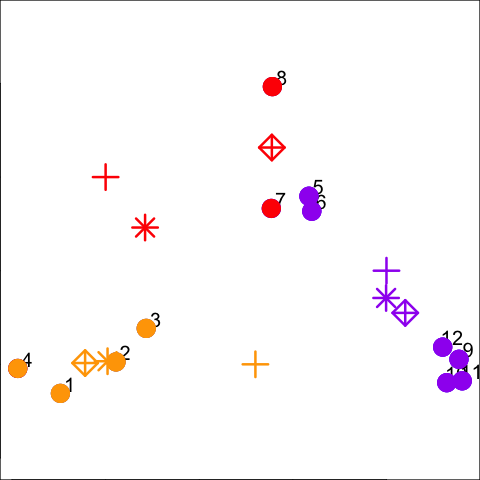

In [18]:
# Ta có thể biểu diễn các giá trị trung tâm vừa mới cập nhật lên biểu đồ.
par(mar=c(0,0,0,0))
plot(x,y,col="blue",pch=19,cex=2,asp=1)
text(x+0.05,y+0.05,labels=as.character(1:12))
points(cx,cy,col=c("red","orange","purple"),pch=3,cex=2,lwd=2)
points(x,y,pch=19,cex=2,col=cols1[newClust])
points(newCx,newCy,col=cols1,pch=8,cex=2,lwd=2)
points(x,y,pch=19,cex=2,col=cols1[newClust2])
points(finalCx,finalCy,col=cols1,pch=9,cex=2,lwd=2)

Nếu tiếp tục cập nhật lại việc gom nhóm ta có thể thấy điểm 5 đến 8 sẽ thuộc về nhóm đỏ, điểm 1 đến 4 vẫn thuộc nhóm cam, và điểm 9 đến 12 thuộc nhóm tía. Sau từng bước thực hiện giải thuật k-means trên, bạn sẽ tự hỏi liệu R có cung cấp cho chúng ta hàm nào tương tự như vậy không. Dĩ nhiên, R cung cấp cho chúng ta hàm kmeans() để thực hiện các tác vụ trên. Ta quan tâm đến các đối số x (ma trận tập dữ liệu), centers (giá trị k muốn gom nhóm), iter.max (vòng lặp tối đa), nstart (chọn giá trị k ngẫu nhiên). Ta thử gọi hàm kmeans với hai đối số là dataFrame (chứa tọa độ x và y của 12 điểm dữ liệu) và centers (k giá trị muốn gom nhóm) bằng 3.


In [19]:
kmObj <- kmeans(dataFrame,centers=3)
kmObj

K-means clustering with 3 clusters of sizes 4, 4, 4

Cluster means:
          x         y
1 1.9906904 2.0078229
2 2.8534966 0.9831222
3 0.8904553 1.0068707

Clustering vector:
 [1] 3 3 3 3 1 1 1 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 0.34732441 0.03298027 0.34188313
 (between_SS / total_SS =  93.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Hàm kmeans() trả về thông tin gom nhóm cho tập dữ liệu ban đầu. Ta có thể truy suất thuộc tính iter cho biết số vòng lặp của kmeans như sau:


In [20]:
kmObj$iter

[1] 2

Dựa vào các thông tin trong kmObj ta có thể biểu diễn kết quả gom nhóm dữ liệu của kmeans ra biểu đồ:


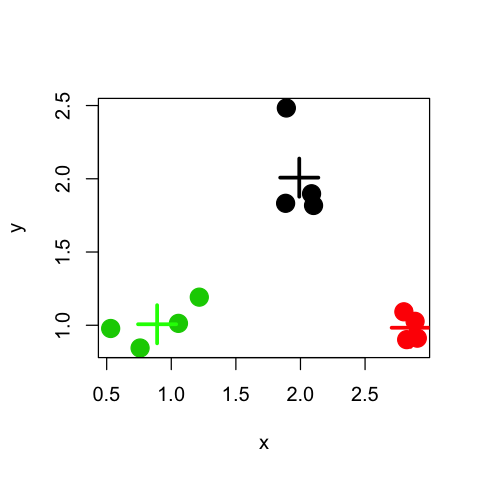

In [21]:
plot(x,y,col=kmObj$cluster,pch=19,cex=2)
points(kmObj$centers,col=c("black","red","green"),pch=3,cex=3,lwd=3)

Bây giờ, ta sẽ quan sát kết quả gom nhóm của kmeans bị ảnh hưởng như thế nào nếu ta chọn số k khác 3 bằng cách truyền đối số nstart. Ví dụ ta muốn kmeans gom nhóm tập dữ liệu với k bằng 6. Ta lặp lại lệnh gom nhóm này 3 lần để thấy sự khác biệt trong kết quả gom nhóm.

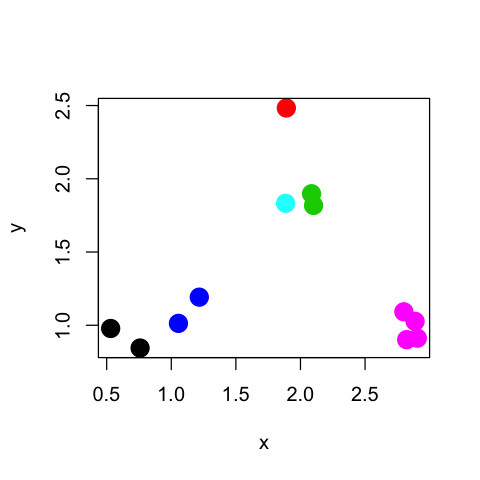

In [22]:
# lặp lại hàm này 3 lần
plot(x,y,col=kmeans(dataFrame,6)$cluster,pch=19,cex=2)

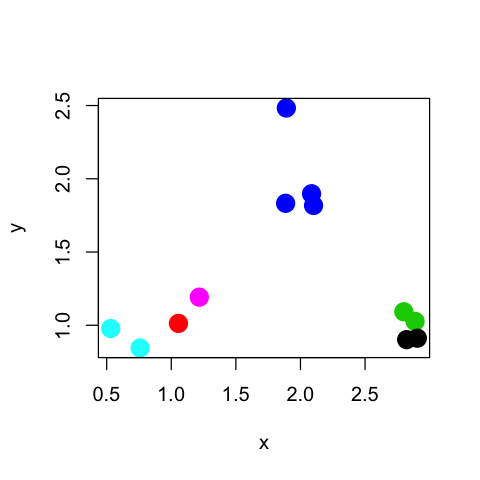

In [23]:
# lặp lại hàm này 3 lần
plot(x,y,col=kmeans(dataFrame,6)$cluster,pch=19,cex=2)

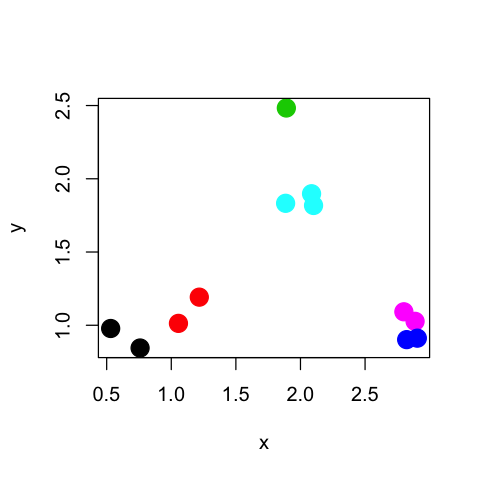

In [24]:
# lặp lại hàm này 3 lần
plot(x,y,col=kmeans(dataFrame,6)$cluster,pch=19,cex=2)

Như vậy qua bài viết trên, khi làm việc với k-means, trước tiên, ta cần xác định số k mà mình muốn gom nhóm. Giải thuật dừng khi đạt tới ngưỡng điều kiện cho phép như giới hạn số vòng lặp. Hy vọng ta có thể hiểu hơn về tập dữ liệu của mình nhờ công cụ này.

<strong>Nguồn tham khảo:</strong> <a href="http://swirlstats.com/" target="_blank" rel="noopener">http://swirlstats.com/</a>